# Regressão Linear - World Happiness Report

[Dataset](https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=lte_1&id=40916)

## Carregamento do dataset

In [1]:
import pandas
from pandas import DataFrame
from sklearn.datasets import fetch_openml

happiness_dataset = fetch_openml(data_id=40916)

## Metadados do dataset

In [2]:
happiness_dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
happiness_dataset['DESCR']

'**Author**: Sustainable Development Solutions Network  \n**Source**: [Kaggle](https://www.kaggle.com/unsdsn/world-happiness) - 2017  \n**Please cite**: None indicated  \n\n**The World Happiness Report** is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015 (represented here), and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the s

In [4]:
happiness_dataset['data']

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156.0,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157.0,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
dataframe: DataFrame = happiness_dataset['data']
dataframe.dtypes

Region                           category
Happiness Rank                    float64
Standard Error                    float64
Economy (GDP per Capita)          float64
Family                            float64
Health (Life Expectancy)          float64
Freedom                           float64
Trust (Government Corruption)     float64
Generosity                        float64
Dystopia Residual                 float64
dtype: object

## Treinamento do modelo

In [6]:
target = dataframe[['Happiness Rank']]

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Remove as colunas de erro, valor esperado e região (string)
features = dataframe.drop(columns=['Region', 'Happiness Rank', 'Standard Error'])

lr_model = LinearRegression()
lr_model.fit(features, target)
predict = lr_model.predict(features)

In [8]:
mse = mean_squared_error(target, predict)
print('MSE:', mse)

intercept_value = lr_model.intercept_
print('Intercept:', intercept_value)

coefficient = lr_model.coef_
print('Coeficientes:', coefficient)

MSE: 30.071056142041822
Intercept: [291.04796249]
Coeficientes: [[-39.37660453 -37.71264434 -45.30300792 -41.54902437 -31.00429306
  -33.21811605 -39.14809299]]


In [9]:
from typing import Tuple, List


def calc_error(delta=100) -> Tuple[List[float], List[float]]:
    _model = LinearRegression()
    _model.fit(features, target)

    intercept = _model.intercept_
    intercept_values = numpy.linspace(intercept - delta, intercept + delta, max(delta, 100))
    mse_array = []

    for value in intercept_values:
        lr_model.intercept_ = value
        y_predicted = lr_model.predict(features)
        _mse = mean_squared_error(target, y_predicted)
        mse_array.append(_mse)

    return mse_array, intercept_values

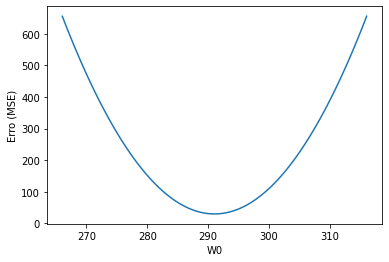

In [10]:
from matplotlib import pyplot
import numpy

pyplot.ylabel("Erro (MSE)")
pyplot.xlabel("W0")

errors, weights = calc_error(25)
pyplot.plot(weights, errors)